In [1]:
import ee
import xarray as xr
import pandas as pd
import numpy as np
import dask.array as da
import xee
from bbox import * 
from datetime import datetime

# Trigger the authentication flow
ee.Authenticate()

# Initialize the Earth Engine library
ee.Initialize(project='satellite-modeling')

# Define the rectangle that encompasses Louisiana and Texas
bbox = ee.Geometry.Rectangle([lon_min, lat_min, lon_max, lat_max])

start_date = '2019-07-31'
end_date = datetime.now().strftime('%Y-%m-%d')

In [2]:
no2_hours = pd.read_csv("../../data/tempo_data/no2_file_hours.csv")
no2_hours=list(no2_hours['time_hr_ct'])
time_list = np.array(no2_hours, dtype="datetime64[ns]")

In [8]:
##################################################
# Load GEOS-CF Data
##################################################

# List of climate variables to download from NLDAS
variables =['population']

# Load NLDAS hourly data and filter by region and date
dataset = ee.ImageCollection("WorldPop/GP/100m/pop_age_sex") \
            .filterBounds(bbox) \
            .select(variables)

ds = xr.open_dataset(dataset, engine='ee', crs='EPSG:4326', scale=0.01)
# Filter the dataset based on the latitude and longitude bounds
ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
ds = ds.isel(time=3)
ds = ds.fillna(0)


In [9]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:     (lon: 1060, lat: 480)
Coordinates:
    time        datetime64[ns] 8B 2020-01-01
  * lon         (lon) float64 8kB -98.9 -98.89 -98.88 ... -88.32 -88.31 -88.3
  * lat         (lat) float64 4kB 28.61 28.62 28.63 28.64 ... 33.37 33.38 33.39
Data variables:
    population  (lon, lat) float32 2MB 0.0 0.0 0.0 ... 0.1807 0.009367 0.01113
Attributes: (12/20)
    date_range:               [1577836800000, 1609459200000]
    description:              <p>Global high-resolution, contemporary data on...
    keywords:                 ['demography', 'population', 'worldpop']
    max_mirrored_version:     1612956012045364
    period:                   0
    product_tags:             ['population', 'demography']
    ...                       ...
    visualization_0_bands:    population
    visualization_0_max:      50.0
    visualization_0_min:      0.0
    visualization_0_name:     Population
    visualization_0_palette:  24126c,1fff4f,d4ff50
    crs:                      EPSG:4326

In [11]:
ds.to_netcdf('../../data/other/population_density.nc')

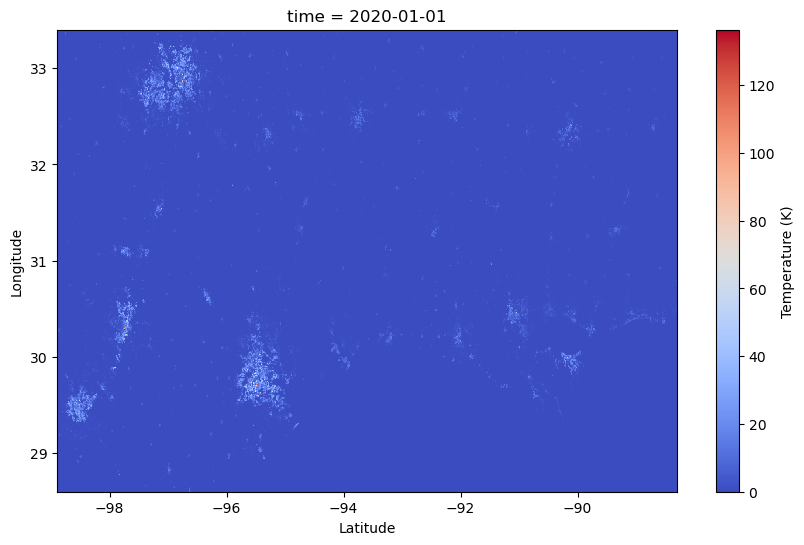

In [10]:
import matplotlib.pyplot as plt
# Define your latitude and longitude bounds
lat_min, lat_max = 28.6, 33.4  # Example latitude range
lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
# hour_index = 0  # Change this to select a different hour if desired
temperature_data = ds['population']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()